# Deep Learning with PyTorch, 9-day mini-course

- Contents
- Before We Get Started... 1
- Lesson 01: Introduction to PyTorch 4
- Lesson 02: Build Your First Multilayer Perceptron Model 6
- Lesson 03: Training a PyTorch Model 8
- Lesson 04: Using a PyTorch Model for Inference 10
- Lesson 05: Loading Data from Torchvision 12
- Lesson 06: Using PyTorch DataLoader 14
- Lesson 07: Convolutional Neural Network 16
- Lesson 08: Train an Image Classifier 18
- Lesson 09: Train with GPU 20
- Final Word Before You Go...

In [14]:

# Example of PyTorch library
import torch
import torch.nn.functional as F

# declare two symbolic floating-point scalars
x= torch.tensor(
    [[[1,2,3,4,5,6,7,8,9]]]
    )
w= torch.tensor(
    [[[1,1,1]],[[1,-1,1]]]
    )
# compute the 1d convolution of x with w
y= F.conv1d(x,w)

x,w,y



(tensor([[[1, 2, 3, 4, 5, 6, 7, 8, 9]]]),
 tensor([[[ 1,  1,  1]],
 
         [[ 1, -1,  1]]]),
 tensor([[[ 6,  9, 12, 15, 18, 21, 24],
          [ 2,  3,  4,  5,  6,  7,  8]]]))

In [26]:
b=   1
c=   1
k=   2

tx= 10

tw=  3

import numpy as np
x= np.arange(0,b*c*tx).reshape(b,c,tx)
w= np.arange(0,k*c*tw).reshape(k,c,tw)

x= torch.tensor(x)
w= torch.tensor(w)
y= F.conv1d(x,w)

x.shape, w.shape, y.shape
x,w,y

(tensor([[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]], dtype=torch.int32),
 tensor([[[0, 1, 2]],
 
         [[3, 4, 5]]], dtype=torch.int32),
 tensor([[[ 5,  8, 11, 14, 17, 20, 23, 26],
          [14, 26, 38, 50, 62, 74, 86, 98]]], dtype=torch.int32))

In [7]:
#torch.__version__ # '2.0.0+cu117'


'2.0.0+cu117'

In [8]:
import torch.nn as nn
model= nn.Sequential(
    nn.Linear(8, 12), nn.ReLU(),
    nn.Linear(12, 8), nn.ReLU(),
    nn.Linear(8, 1),  nn.Sigmoid()
    )

model



Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)

In [9]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1805,  0.0784,  0.1806, -0.3347, -0.3429, -0.2818,  0.2866, -0.3234],
                      [ 0.2035,  0.1496, -0.0955,  0.1065, -0.2913,  0.1526, -0.0726, -0.0520],
                      [ 0.1443,  0.0901,  0.3058,  0.2707,  0.2372,  0.1879,  0.1209,  0.1223],
                      [-0.2975, -0.0616,  0.2127, -0.1660,  0.1420, -0.1274,  0.3463,  0.0067],
                      [ 0.0891, -0.0829, -0.1323,  0.1589, -0.1981,  0.0590, -0.0646,  0.3307],
                      [ 0.2385,  0.1803, -0.0527,  0.0446, -0.3382,  0.0548,  0.3468,  0.0220],
                      [ 0.0194,  0.0155,  0.1502, -0.2088, -0.0935,  0.2859, -0.0915, -0.1387],
                      [ 0.0848,  0.2024, -0.2278,  0.0709,  0.0759, -0.3171,  0.3060,  0.0533],
                      [-0.2779,  0.0355, -0.1682,  0.1588, -0.0816, -0.0773, -0.0285,  0.0320],
                      [ 0.3249,  0.0301, -0.0963, -0.1562,  0.2124, -0.0587,  0.0339, -0.2201],
              

In [10]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

dataset= np.loadtxt(
    'pima-indians-diabetes.csv', 
    delimiter=',')

X= dataset[:,0:8]
y= dataset[:,8]

X= torch.tensor(X, dtype=torch.float32)
y= torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

loss_fn= nn.BCELoss() # binary cross-entropy


In [11]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs=  100
batch_size= 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        
        Xbatch= X[i:i+batch_size]
        y_pred= model(Xbatch)
        ybatch= y[i:i+batch_size]
        loss=   loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print(f'Finished epoch {epoch}, latest loss {loss}')



Finished epoch 0, latest loss 0.7613898515701294
Finished epoch 0, latest loss 0.8093783259391785
Finished epoch 0, latest loss 1.9843429327011108
Finished epoch 0, latest loss 1.3417936563491821
Finished epoch 0, latest loss 0.8799972534179688
Finished epoch 0, latest loss 2.6239819526672363
Finished epoch 0, latest loss 1.5088989734649658
Finished epoch 0, latest loss 1.9456945657730103
Finished epoch 0, latest loss 1.4051134586334229
Finished epoch 0, latest loss 2.2219479084014893
Finished epoch 0, latest loss 1.4627848863601685
Finished epoch 0, latest loss 0.7076016664505005
Finished epoch 0, latest loss 1.298468828201294
Finished epoch 0, latest loss 1.8335466384887695
Finished epoch 0, latest loss 1.5818965435028076
Finished epoch 0, latest loss 2.5121140480041504
Finished epoch 0, latest loss 1.4320342540740967
Finished epoch 0, latest loss 0.7390801906585693
Finished epoch 0, latest loss 0.5823284387588501
Finished epoch 0, latest loss 0.7768770456314087
Finished epoch 0, lat

In [12]:
i = 5
X_sample= X[i:i+1]
y_pred= model(X_sample)

print(f"{X_sample[0]} -> {y_pred[0]}")

tensor([  5.0000, 116.0000,  74.0000,   0.0000,   0.0000,  25.6000,   0.2010,
         30.0000]) -> tensor([0.3049], grad_fn=<SelectBackward0>)


In [29]:
x= X[0]
y_pred= model(x)
x, y_pred

(tensor([  6.0000, 148.0000,  72.0000,  35.0000,   0.0000,  33.6000,   0.6270,
          50.0000]),
 tensor([0.6837], grad_fn=<SigmoidBackward0>))

In [27]:
model.eval()
with torch.no_grad():
    y_pred = model(X)

In [28]:
accuracy= (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")


Accuracy 0.7565104365348816


100%|██████████| 170498071/170498071 [00:27<00:00, 6207818.84it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


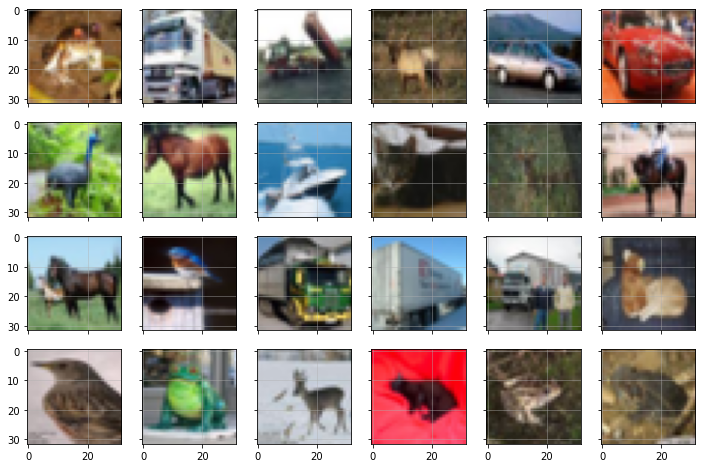

In [30]:
import matplotlib.pyplot as plt
import torchvision

trainset= torchvision.datasets.CIFAR10(root='./data', train=True,  download=True)
testset=  torchvision.datasets.CIFAR10(root='./data', train=False, download=True)
fig, ax= plt.subplots(4, 6, 
                      sharex=True, 
                      sharey=True, 
                      figsize=(12,8))
for i in range(0, 24):
    row, col = i//6, i%6
    ax[row][col].imshow(trainset.data[i])
plt.show()


In [32]:
trainset.data.shape, testset.data.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

Files already downloaded and verified
Files already downloaded and verified


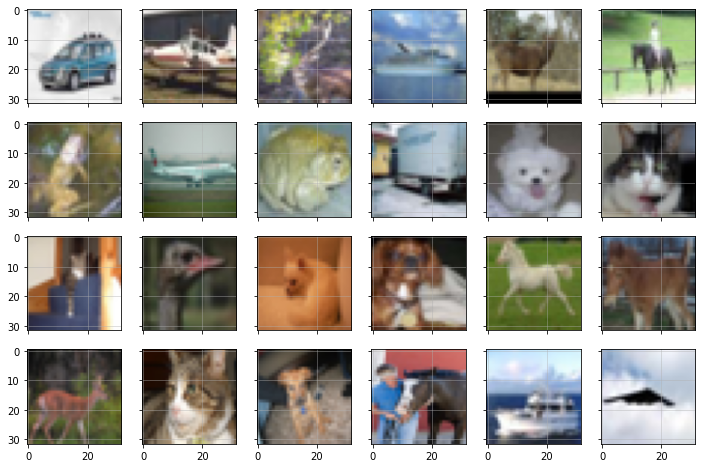

In [33]:
import matplotlib.pyplot as plt
import torchvision
import torch
from torchvision.datasets import CIFAR10

transform= torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset=  CIFAR10(root='./data', train=True, download=True, transform=transform)
testset=   CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size= 24
trainloader= torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader=  torch.utils.data.DataLoader(testset,  batch_size=batch_size, shuffle=True)

fig, ax = plt.subplots(4, 6, sharex=True, sharey=True, figsize=(12,8))

for images, labels in trainloader:
    for i in range(batch_size):
        row, col = i//6, i%6
        ax[row][col].imshow(images[i].numpy().transpose([1,2,0]))
    break # take only the first batch
plt.show()

In [34]:
import torch.nn as nn

model= nn.Sequential(
    nn.Conv2d(3,  32, kernel_size=(3,3), stride=1, padding=1), nn.ReLU(), nn.Dropout(0.3),
    nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=(2, 2)),
    nn.Flatten(),
    nn.Linear(8192, 512), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(512, 10)
    )

model

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=8192, out_features=512, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
import torch.nn as nn
import torch.optim as optim

loss_fn=    nn.CrossEntropyLoss()
optimizer= optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# this is for demonstration purposes only, 
# because it takes a long time to train
# you should use at least 10 epochs
# and a GPU for training

n_epochs= 2 # 10
for epoch in range(n_epochs):
    model.train()
    for inputs, labels in trainloader:
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    acc = 0
    count = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            y_pred = model(inputs)
            acc += (torch.argmax(y_pred, 1) == labels).float().sum()
            count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))



In [37]:
'''
The model training you did in the previous lesson should take a while. 
If you have a supported GPU, you can speed up the training a lot.
The way to use GPU in PyTorch is to send the model and data to GPU before execution.
Then you have an option to send back the result from GPU, 
or perform the evaluation in GPU directly.
It is not difficult to modify the code from the previous lesson to use GPU. 
Below is what it should be done:
'''

import torch.nn as nn
import torch.optim as optim

device= torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
print("Using device:", device)

loss_fn=    nn.CrossEntropyLoss()
optimizer=  optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

n_epochs= 20
for epoch in range(n_epochs):
    model.train()
    for inputs, labels in trainloader:
        inputs= inputs.to(device)
        labels= labels.to(device)
        
        y_pred= model(inputs)
        
        loss= loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    acc= 0
    count= 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs= inputs.to(device)
            labels= labels.to(device)
            y_pred = model(inputs)
            acc += (torch.argmax(y_pred, 1) == labels).float().sum()
            count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

# Epoch 19: model accuracy 70.10%



Using device: cuda:0
Epoch 0: model accuracy 68.30%
Epoch 1: model accuracy 69.65%
Epoch 2: model accuracy 68.59%
Epoch 3: model accuracy 69.44%
Epoch 4: model accuracy 69.69%
Epoch 5: model accuracy 69.74%
Epoch 6: model accuracy 69.00%
Epoch 7: model accuracy 69.79%
Epoch 8: model accuracy 69.81%
Epoch 9: model accuracy 69.89%
Epoch 10: model accuracy 69.33%
Epoch 11: model accuracy 69.59%
Epoch 12: model accuracy 70.10%
Epoch 13: model accuracy 70.03%
Epoch 14: model accuracy 69.98%
Epoch 15: model accuracy 69.66%
Epoch 16: model accuracy 69.91%
Epoch 17: model accuracy 70.22%
Epoch 18: model accuracy 70.26%
Epoch 19: model accuracy 70.10%
